In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#importing libraries

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of data.csv")

#importing spotify dataset

In [ ]:
df.head()
#displaying first 5 rows


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
df.tail()
#displaying last 5 rows

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

#displaying no of rows and columns and the column names

Shape: (2017, 18)
Columns: ['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target', 'song_title', 'artist', 'mood']


In [ ]:
df.info()

#the data types and missing values from the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
df.describe()

#stats summary of all the columns

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
categorical = df.select_dtypes(exclude=np.number).columns.tolist()

print("numerical columns:", numerical), print("categorial columns:", categorical)

#seperating numerical and categorical features

numerical columns: ['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target']
categorial columns: ['song_title', 'artist']


(None, None)

In [ ]:
df.isnull().sum()
#identifying missing values

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


In [ ]:
df = df.dropna() #removing the missing values
features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
X = df[features] #selection of important categories to analyse the mood of a song
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head() #standar

#normalisation scales data between 0 & 1 whereas standardisation centres data to mean = 0 and std = 1

,danceability,energy,loudness,tempo,valence
0,1.332874,-1.177700,-0.454530,1.066709,-0.853039
1,0.773830,-1.534468,-0.881573,1.442323,0.368970
2,1.363932,-1.282352,-0.016586,-1.745166,-1.310280
3,-0.772860,-1.634363,-2.167220,-1.316964,-1.079636
4,0.370075,-0.573574,-1.213155,1.964120,1.647627


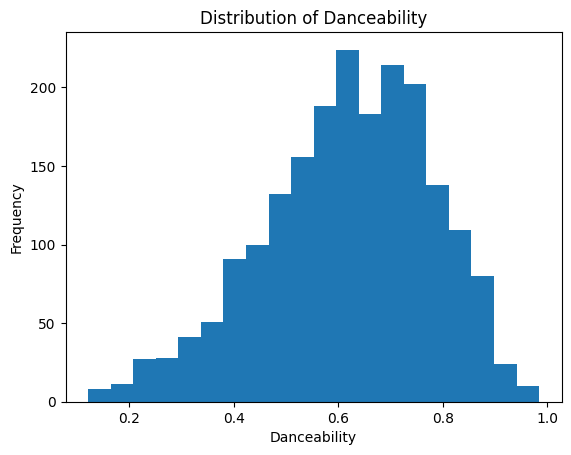

In [ ]:
plt.hist(df['danceability'], bins=20)
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.title("Distribution of Danceability")
plt.show()
#histogram of danceability (most songs have medium to high danceability)

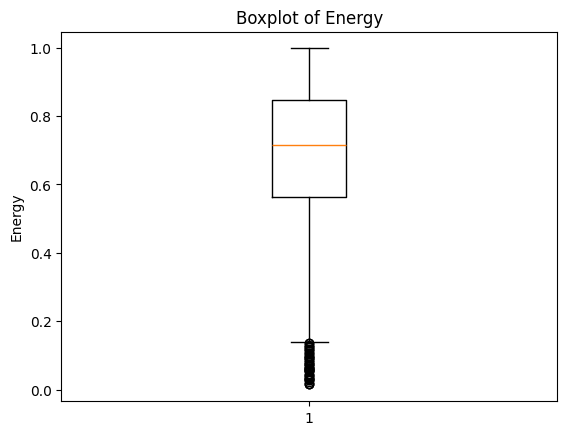

In [ ]:
plt.boxplot(df['energy'])
plt.ylabel("Energy")
plt.title("Boxplot of Energy")
plt.show()


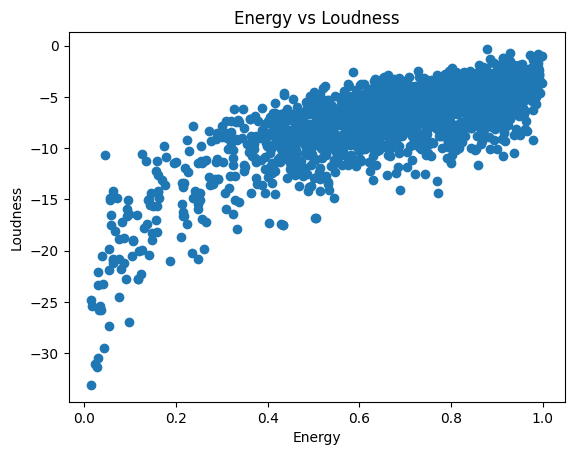

In [ ]:
plt.scatter(df['energy'], df['loudness'])
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.title("Energy vs Loudness")
plt.show()

#energy vs loudness scatterplot (louder songs tend to have higher energy)

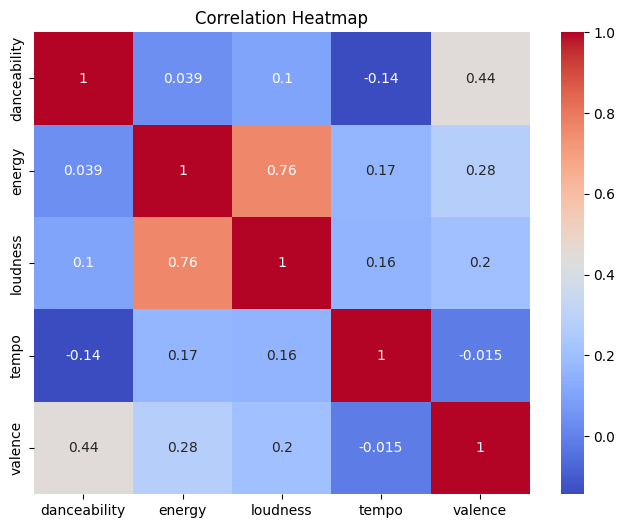

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#danceability describes how suitable a track is for dancing, energy describes the intensity of the song, valence describes the happiness/positivity of the song
#happy songs often have high valence, high energy & tempo, and high danceability

In [ ]:
df['mood'] = df['valence'].apply(lambda x: 1 if x >= 0.5 else 0)
df[['valence', 'mood']].head()

#creating mood label (songs with valence ≥ 0.5 are labeled as happy, otherwise sad)


,valence,mood
0,0.286,0
1,0.588,1
2,0.173,0
3,0.230,0
4,0.904,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df['mood'], test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1613, 5)
Test set size: (404, 5)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Logistic Regression Accuracy: 0.9876237623762376
Confusion Matrix:
 [[228   0]
 [  5 171]]
